In [4]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [5]:
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1000, 50, 1)
(209, 50, 1)
(1000, 1)
(209, 1)


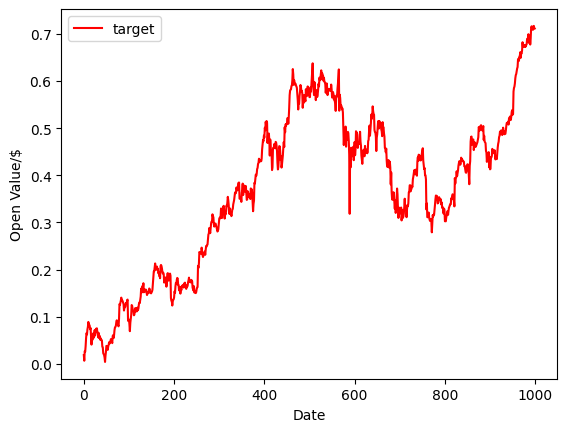

In [6]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='target')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

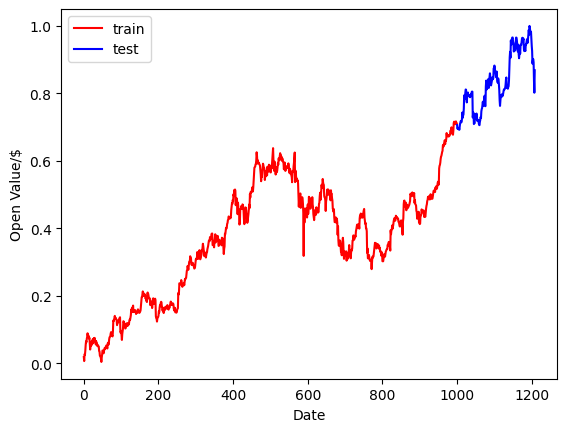

In [7]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD


# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(train_data.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(train_data.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(train_data.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# compiling the model

regressorGRU.compile(optimizer=SGD(decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# fitting the model

history = regressorGRU.fit(train_data, train_target, epochs=20, batch_size=150,validation_data=(test_data,test_target))

Epoch 1/20


c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 450ms/step - loss: 0.0024 - val_loss: 0.0098
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0024 - val_loss: 0.0064
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - loss: 0.0020 - val_loss: 0.0021

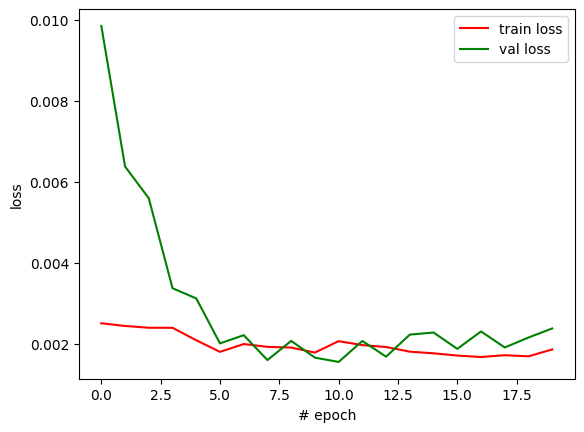

In [15]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
result=regressorGRU.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step
r2 score: 0.6766934045706499


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


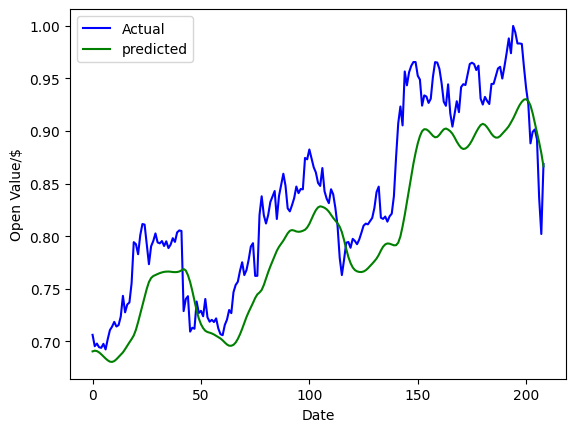

In [17]:
result=regressorGRU.predict(test_data)
plt.plot(test_target,'b',label='Actual')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [18]:
regressorGRU.save('LSTM-Stock-Market-GRU-Model.keras')